In [1]:
import pyportlib

# Portfolio Metrics

Importing TFSA and benchmark

In [2]:
ptf = pyportlib.Portfolio(account='questrade_tfsa', currency="CAD")
benchmark = pyportlib.Portfolio(account='bench_tfsa', currency='CAD')
# refresh_token=""
q = pyportlib.QuestradeConnection(account_name='tfsa')

2022-04-19 00:36:43,242:ERROR:no market value computed for BPY.UN.TO: in compute_market_value
2022-04-19 00:36:43,266:ERROR:no market value computed for LGND: in compute_market_value


Updating portfolio data

In [3]:
ptf.update_data(fundamentals_and_dividends=False)
benchmark.update_data(fundamentals_and_dividends=False)
q.update_ptf(ptf)


1 Failed download:
- BPY-UN.TO: No data found, symbol may be delisted


2022-04-19 00:37:24,659:ERROR:no market value computed for BPY.UN.TO: in compute_market_value
2022-04-19 00:37:24,683:ERROR:no market value computed for LGND: in compute_market_value
2022-04-19 00:37:30,913:ERROR:Other not supported. might be dividend withrawal tax: in _make_transaction
2022-04-19 00:37:34,012:ERROR:no market value computed for BPY.UN.TO: in compute_market_value
2022-04-19 00:37:34,035:ERROR:no market value computed for LGND: in compute_market_value


Config

In [4]:
figsize = (16, 5)
date = pyportlib.dates_utils.last_bday()

## Rolling $\sigma$

2022-04-19 00:37:35,372:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


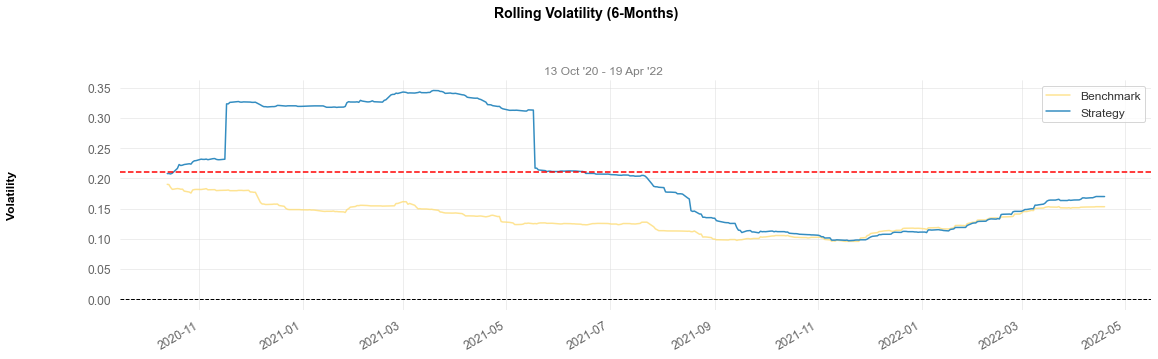

In [5]:
lk = '2y'
pyportlib.plots.rolling_vol(ptf, lookback=lk, benchmark=benchmark, figsize=figsize, include_cash=True)

## Rolling $\beta$

2022-04-19 00:37:37,807:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


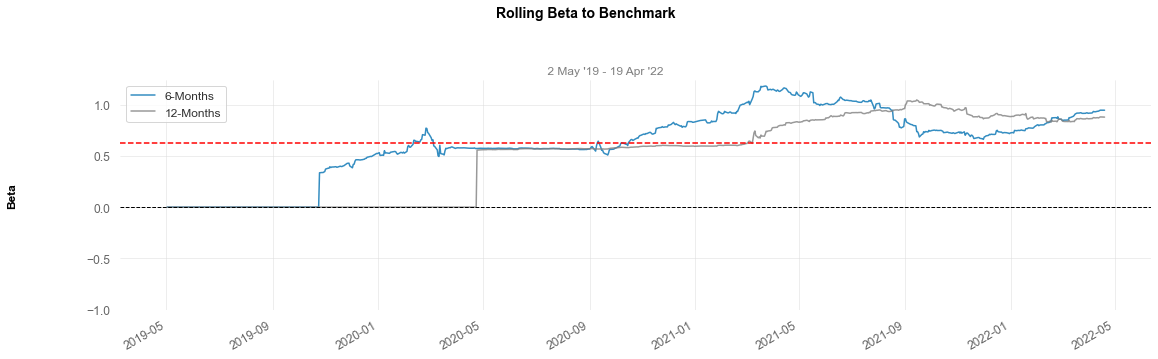

In [6]:
lk = '5y'
pyportlib.plots.rolling_beta(ptf, lookback=lk, benchmark=benchmark, figsize=figsize, include_cash=True)

## Rolling $\alpha$

2022-04-19 00:37:40,367:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


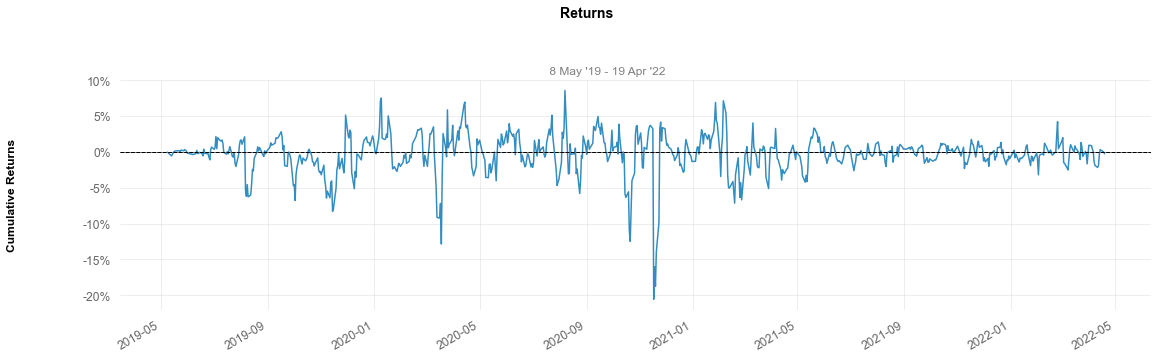

In [7]:
lk = "5y"
rolling_alpha = pyportlib.stats.rolling_alpha(ptf, lookback=lk, benchmark=benchmark, rolling_period=5, include_cash=True).dropna()
pyportlib.plots.returns(rolling_alpha, lookback=lk, figsize=figsize, compound=False)

## Risk


In [10]:
lookback = '1y'
quantile = 0.99
print(f"{lookback} skewness: {pyportlib.stats.skew(ptf, lookback=lookback, include_cash=True)}")
print(f"{lookback} kurtosis: {pyportlib.stats.kurtosis(ptf, lookback=lookback, include_cash=True)}")
print(f"{lookback} vol:      {pyportlib.stats.annualized_volatility(ptf, lookback=lookback, include_cash=True)}")
print(f"{lookback} beta:     {pyportlib.stats.beta(ptf, benchmark=benchmark, lookback=lookback, include_cash=True)}")
print(f"{lookback} alpha:    {pyportlib.stats.alpha(ptf, benchmark=benchmark, lookback=lookback, include_cash=True)}")
print(f"{lookback} VaR{quantile}:  %{100 * pyportlib.stats.value_at_risk(ptf, '1y', quantile=quantile, include_cash=True)}")

1y skewness: 0.13038969845296736
1y kurtosis: 0.9456961864483269
1y vol:      0.14201551665869602
1y beta:     0.88
1y alpha:    -0.13124166238305837
1y VaR0.99:  %2.104468422701594


### VaR

In [11]:
lk = "1y"
var99 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.99, include_cash=True) * 100
var975 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.975, include_cash=True) * 100
var95 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.95, include_cash=True) * 100
print("Gaussian VaR")
print(f"VaR   99%: {var99} %")
print(f"VaR 97.5%: {var975} %")
print(f"VaR   95%: {var95} %\n")

var99 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.99, include_cash=True, method="historical") * 100
var975 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.975, include_cash=True, method="historical") * 100
var95 = pyportlib.stats.value_at_risk(ptf, lookback=lk, quantile=0.95, include_cash=True, method="historical") * 100
print("Historical VaR")
print(f"VaR   99%: {var99} %")
print(f"VaR 97.5%: {var975} %")
print(f"VaR   95%: {var95} %\n")

mkt_val = ptf.market_value.loc[date]
print(f"VaR   99%: {var99/100 * mkt_val}$")
print(f"VaR 97.5%: {var975/100 * mkt_val}$")
print(f"VaR   95%: {var95/100 * mkt_val}$")

Gaussian VaR
VaR   99%: 2.104468422701594 %
VaR 97.5%: 1.77669638843873 %
VaR   95%: 1.494794356488479 %

Historical VaR
VaR   99%: 1.997534018125661 %
VaR 97.5%: 1.7387211281020312 %
VaR   95%: 1.4111405214983475 %

VaR   99%: 366.78431736786354$
VaR 97.5%: 319.2614675280421$
VaR   95%: 259.1115886845148$


## Rolling VaR

2022-04-19 00:39:12,757:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


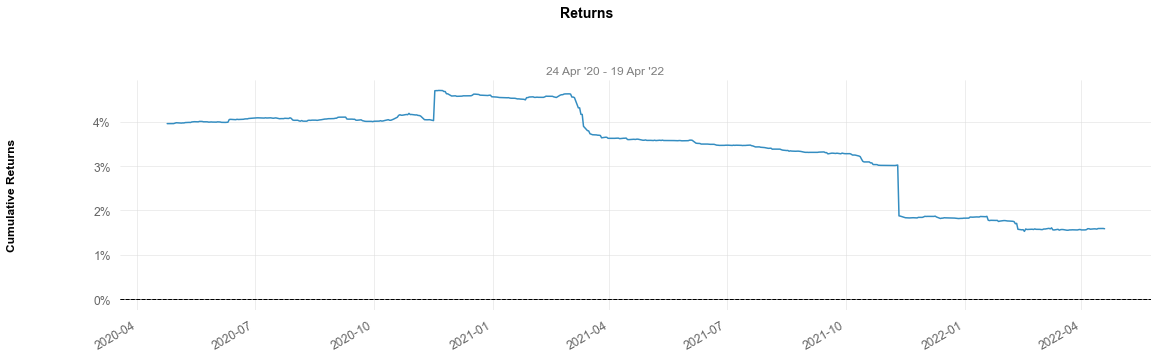

2022-04-19 00:39:14,468:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


<AxesSubplot:title={'center':'Portfolio VaR 1y 95.0% $'}>

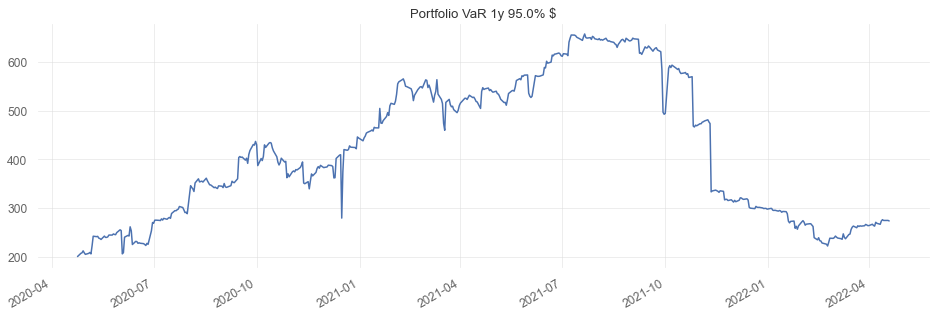

In [21]:
lk = "5y"
quantile = 0.95
pyportlib.plots.rolling_var(ptf, lookback=lk, rolling_period=252, quantile=quantile, figsize=figsize, include_cash=True)
roll_var = pyportlib.stats.rolling_var(ptf, lookback=lk, rolling_period=252, quantile=quantile, include_cash=True)
roll_var = roll_var * ptf.market_value.loc[ptf.market_value.index.isin(roll_var.index)]

roll_var.plot(figsize=figsize, title=f"Portfolio VaR 1y {quantile*100}% $")

### Benchmark Stats

In [13]:
lookback = '1y'
quantile = 0.99
print(f"{lookback} skewness: {pyportlib.stats.skew(benchmark, lookback=lookback)}")
print(f"{lookback} kurtosis: {pyportlib.stats.kurtosis(benchmark, lookback=lookback)}")
print(f"{lookback} vol: {pyportlib.stats.annualized_volatility(benchmark, lookback=lookback)}")
print(f"{lookback} VaR {quantile}: {pyportlib.stats.value_at_risk(benchmark, '1y', quantile=quantile)}")

1y skewness: 0.02480751533783341
1y kurtosis: 0.34997585676633003
1y vol: 0.13014784854727662
1y VaR 0.99: 0.018761326962188497


## Liquidity
### Cash $

<AxesSubplot:title={'center':'Portfolio Cash $ (CAD)'}>

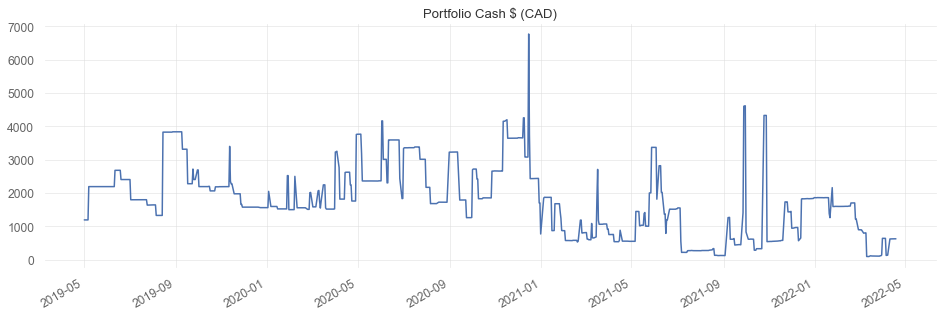

In [14]:
ptf.cash_history.plot(figsize=figsize, title="Portfolio Cash $ (CAD)")

### Market Value

<AxesSubplot:>

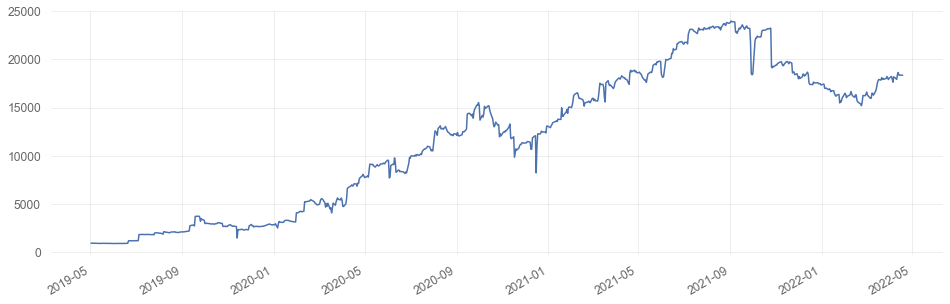

In [16]:
ptf.market_value.plot(figsize=figsize)

### Cash Management Effect

2022-04-19 00:38:10,494:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl
2022-04-19 00:38:11,534:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


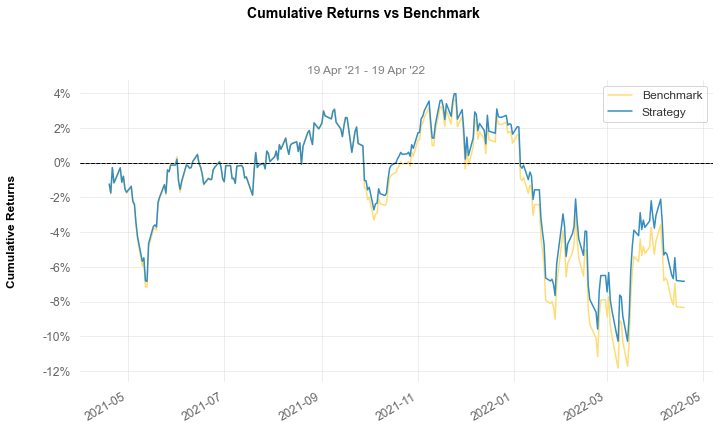

Beta with cash   : 0.88
Beta without cash: 0.93


In [17]:
wcash = ptf.pct_daily_total_pnl(start_date=ptf.start_date, include_cash=True)
ncash = ptf.pct_daily_total_pnl(start_date=ptf.start_date)

lk = "1y"
pyportlib.plots.returns(wcash, benchmark=ncash, lookback=lk)
print(f"Beta with cash   : {round(pyportlib.stats.beta(wcash, benchmark=benchmark, lookback=lk), 2)}")
print(f"Beta without cash: {round(pyportlib.stats.beta(ncash, benchmark=benchmark, lookback=lk), 2)}")

### Portfolio Correlation Clusters
For active position as of {date}

<AxesSubplot:>

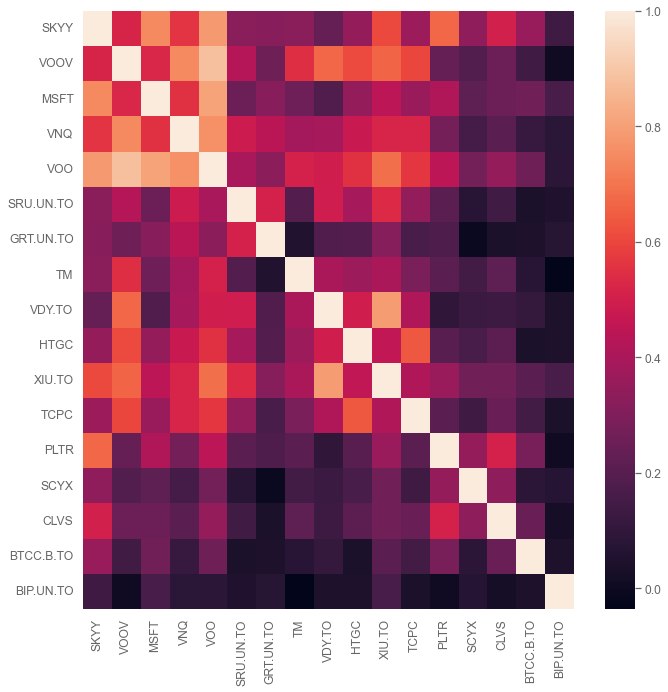

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

corr_mat = pyportlib.stats.cluster_corr(ptf.corr(date=datetime(2022, 3, 11)))

plt.figure(figsize = (11,11))
sns.heatmap(corr_mat)